In [1]:
import sys
sys.path.append('../')

import os

import cqt
import cqt.model as md
import cqt.portfolio.portfolio as pfo
import cqt.strategy.strategy as stg
import cqt.strategy.strategy_bear_bull as stg_bb
import cqt.strategy.strategy_long_short_average as stg_ls
import pandas as pd
import pickle

from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
os.listdir('../data/pickle')


['coinapi_coinapi-ohlcv-GEMINI_SPOT_BTC_USD-1DAY_data.pickle',
 'coinapi_coinapi-ohlcv-GEMINI_SPOT_ETH_USD-1DAY_data.pickle',
 'coinapi_ohlcv_BINANCE_SPOT_BTC_USDT_1DAY_data.pickle',
 'coinapi_ohlcv_GEMINI_SPOT_BTC_USD_1DAY_data.pickle',
 'coinapi_ohlcv_GEMINI_SPOT_BTC_USD_1HRS_data.pickle',
 'coinapi_ohlcv_GEMINI_SPOT_BTC_USD_1MIN_data.pickle',
 'coinapi_ohlcv_GEMINI_SPOT_ETH_USD_1DAY_data.pickle',
 'coinapi_ohlcv_GEMINI_SPOT_ETH_USD_1HRS_data.pickle',
 'coinapi_ohlcv_GEMINI_SPOT_ETH_USD_1MIN_data.pickle',
 'gdax_products_BTC-USD_data.pickle',
 'model_btc_eth.pickle']

In [3]:
outDir = '../performance_tracking'
if not os.path.exists(outDir):
    os.makedirs(outDir)
    print(outDir)

In [4]:
pickleFileDir = '../data/pickle'
# btcFileName = 'coinapi_ohlcv_GEMINI_SPOT_BTC_USD_1MIN_data.pickle'
# btcFilePath = os.path.join(pickleFileDir, btcFileName)
# file_btc_eth = open(btcFilePath,'rb')

file_btc = '../data/pickle/coinapi_ohlcv_GEMINI_SPOT_BTC_USD_1DAY_data.pickle'
df_btc = pd.read_pickle(file_btc)
file_eth = '../data/pickle/coinapi_ohlcv_GEMINI_SPOT_eth_USD_1DAY_data.pickle'
df_eth = pd.read_pickle(file_eth)


In [5]:
model_config = {'asset_type': 'spot'}
comp_btc = md.asset_model_component_spot.AssetModelComponentSpot('btc', df_btc, model_config)
comp_eth = md.asset_model_component_spot.AssetModelComponentSpot('eth', df_eth, model_config)

model_btc_eth = md.asset_model.AssetModel([])
model_btc_eth.insert_component(comp_btc)
model_btc_eth.insert_component(comp_eth)
# model_btc_eth = pickle.load(open(os.path.join(pickleFileDir, 'model_btc_eth.pickle'), 'rb'))
# os.listdir('../data/pickle')
# model_btc_eth.

In [6]:
# init portfolio

cash = 10000
assets = {'btc': 0, 'eth': 0}
ini_pfo = pfo.Portfolio(assets, cash)

In [7]:
comp_btc.target

'btc'

In [8]:
# Long/Short Average
ls_rule = {'method' : 'moving_average', 'window_size' : [3, 5], 'tolerance_up' : 0.03, 'tolerance_down' : 0.03}
strats = stg_ls.StrategyLongShortAverage(model_btc_eth, ini_pfo, ls_rule)
start_date_str = '2017-10-01'
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
report = strats.back_testing(start_date)

longShortReport = report.copy()

btc
head of df   time_close  price_close
0 2017-08-31      4583.85
1 2017-09-01      4736.28
2 2017-09-02      4924.00
3 2017-09-03      4642.85
4 2017-09-04      4607.47
price_dict 
           lkey      btc
0   2017-08-31  4583.85
1   2017-09-01  4736.28
2   2017-09-02  4924.00
3   2017-09-03  4642.85
4   2017-09-04  4607.47
5   2017-09-05  4278.86
6   2017-09-06  4393.00
7   2017-09-07  4609.17
8   2017-09-08  4623.19
9   2017-09-09  4346.24
10  2017-09-10  4325.17
11  2017-09-11  4243.48
12  2017-09-12  4209.69
13  2017-09-13  4155.55
14  2017-09-14  3855.01
15  2017-09-15  3242.63
16  2017-09-16  3709.85
17  2017-09-17  3715.38
18  2017-09-18  3716.46
19  2017-09-19  4098.03
20  2017-09-20  3903.40
21  2017-09-21  3866.00
22  2017-09-22  3616.74
23  2017-09-23  3620.96
24  2017-09-24  3783.60
25  2017-09-25  3667.99
26  2017-09-26  3916.48
27  2017-09-27  3885.14
28  2017-09-28  4204.51
29  2017-09-29  4188.00
..         ...      ...
223 2018-04-11  6830.68
224 2018-04-12  6939.43


..\cqt\model\asset_model_component_spot.py:96: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  ma_series.set_value(series.index[window_size + i - 1], avg)


2017-10-01 00:00:00 2017-10-14 00:00:00 2018-05-09 00:00:00
2017-10-14 00:00:00
2017-10-01 00:00:00 2017-10-15 00:00:00 2018-05-09 00:00:00
2017-10-15 00:00:00
2017-10-01 00:00:00 2017-10-16 00:00:00 2018-05-09 00:00:00
2017-10-16 00:00:00
2017-10-01 00:00:00 2017-10-17 00:00:00 2018-05-09 00:00:00
2017-10-17 00:00:00
2017-10-01 00:00:00 2017-10-18 00:00:00 2018-05-09 00:00:00
2017-10-18 00:00:00
2017-10-01 00:00:00 2017-10-19 00:00:00 2018-05-09 00:00:00
2017-10-19 00:00:00
2017-10-01 00:00:00 2017-10-20 00:00:00 2018-05-09 00:00:00
2017-10-20 00:00:00
2017-10-01 00:00:00 2017-10-21 00:00:00 2018-05-09 00:00:00
2017-10-21 00:00:00
2017-10-01 00:00:00 2017-10-22 00:00:00 2018-05-09 00:00:00
2017-10-22 00:00:00
2017-10-01 00:00:00 2017-10-23 00:00:00 2018-05-09 00:00:00
2017-10-23 00:00:00
2017-10-01 00:00:00 2017-10-24 00:00:00 2018-05-09 00:00:00
2017-10-24 00:00:00
2017-10-01 00:00:00 2017-10-25 00:00:00 2018-05-09 00:00:00
2017-10-25 00:00:00
2017-10-01 00:00:00 2017-10-26 00:00:00 

2017-10-01 00:00:00 2018-01-28 00:00:00 2018-05-09 00:00:00
2018-01-28 00:00:00
2017-10-01 00:00:00 2018-01-29 00:00:00 2018-05-09 00:00:00
2018-01-29 00:00:00
2017-10-01 00:00:00 2018-01-30 00:00:00 2018-05-09 00:00:00
2018-01-30 00:00:00
2017-10-01 00:00:00 2018-01-31 00:00:00 2018-05-09 00:00:00
2018-01-31 00:00:00
2017-10-01 00:00:00 2018-02-01 00:00:00 2018-05-09 00:00:00
2018-02-01 00:00:00
2017-10-01 00:00:00 2018-02-02 00:00:00 2018-05-09 00:00:00
2018-02-02 00:00:00
2017-10-01 00:00:00 2018-02-03 00:00:00 2018-05-09 00:00:00
2018-02-03 00:00:00
2017-10-01 00:00:00 2018-02-04 00:00:00 2018-05-09 00:00:00
2018-02-04 00:00:00
2017-10-01 00:00:00 2018-02-05 00:00:00 2018-05-09 00:00:00
2018-02-05 00:00:00
2017-10-01 00:00:00 2018-02-06 00:00:00 2018-05-09 00:00:00
2018-02-06 00:00:00
2017-10-01 00:00:00 2018-02-07 00:00:00 2018-05-09 00:00:00
2018-02-07 00:00:00
2017-10-01 00:00:00 2018-02-08 00:00:00 2018-05-09 00:00:00
2018-02-08 00:00:00
2017-10-01 00:00:00 2018-02-09 00:00:00 

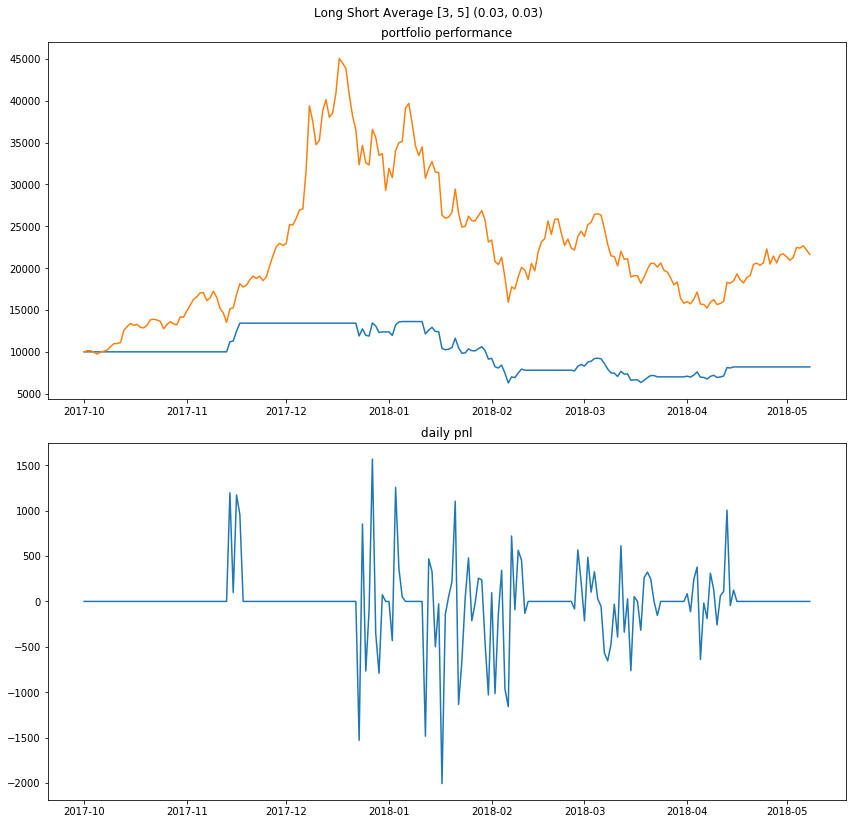

In [9]:
report = longShortReport
strategyName = 'Long Short Average [3, 5] (0.03, 0.03)'
report.to_csv(os.path.join(outDir, strategyName+'.csv'), index=False)
fig_width = 12
fig_height = 12
fig, ax0 = plt.subplots(2,1, figsize=(fig_width,fig_height))
ax0[0].plot(report['date'], report['total'])
ax0[0].plot(report['date'], report['btc_price'] * cash / report['btc_price'][0])
ax0[0].set_title('portfolio performance')
ax0[1].plot(report['date'], report['pnl'])
ax0[1].set_title('daily pnl')
fig.suptitle(strategyName)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.savefig(os.path.join(outDir, strategyName+'.pdf'))
plt.show()

print('max daily gain:', report['pnl'].max())
print('max daily loss:', report['pnl'].min())

In [10]:
class StrategyTest(stg.Strategy):
    def apply_event_logic(self, time, prtf):
        btc = 'btc'
        if self.asset_model.has_component(btc):            
            comp_btc = self.asset_model.get_component(btc)
            ind_btc = comp_btc.signal_double_dip(time, self.rules)
            price_btc = comp_btc.get_price_close(time)
            
            if ind_btc == 1:
                prtf.buy(btc, price_btc)
            else:
                prtf.sell(btc, price_btc)         
        return prtf

max daily gain: 1566.9017086617769
max daily loss: -2005.7462346636767


In [11]:
dd_rule = {'method' : 'moving_average', 'window_size' : [3, 5], 'tolerance_up' : 0.03, 'tolerance_down' : 0.03}
strats = StrategyTest(model_btc_eth, ini_pfo, dd_rule)
start_date_str = '2017-10-01'
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
report = strats.back_testing(start_date)
doubleDipReport = report.copy()

btc
head of df   time_close  price_close
0 2017-08-31      4583.85
1 2017-09-01      4736.28
2 2017-09-02      4924.00
3 2017-09-03      4642.85
4 2017-09-04      4607.47
price_dict 
           lkey      btc
0   2017-08-31  4583.85
1   2017-09-01  4736.28
2   2017-09-02  4924.00
3   2017-09-03  4642.85
4   2017-09-04  4607.47
5   2017-09-05  4278.86
6   2017-09-06  4393.00
7   2017-09-07  4609.17
8   2017-09-08  4623.19
9   2017-09-09  4346.24
10  2017-09-10  4325.17
11  2017-09-11  4243.48
12  2017-09-12  4209.69
13  2017-09-13  4155.55
14  2017-09-14  3855.01
15  2017-09-15  3242.63
16  2017-09-16  3709.85
17  2017-09-17  3715.38
18  2017-09-18  3716.46
19  2017-09-19  4098.03
20  2017-09-20  3903.40
21  2017-09-21  3866.00
22  2017-09-22  3616.74
23  2017-09-23  3620.96
24  2017-09-24  3783.60
25  2017-09-25  3667.99
26  2017-09-26  3916.48
27  2017-09-27  3885.14
28  2017-09-28  4204.51
29  2017-09-29  4188.00
..         ...      ...
223 2018-04-11  6830.68
224 2018-04-12  6939.43


AttributeError: 'AssetModelComponentSpot' object has no attribute 'signal_double_dip'

In [ ]:
strategyName = 'Double Dip [3, 5] (0.03, 0.03)'
report = doubleDipReport
report.to_csv(os.path.join(outDir, strategyName+'.csv'), index=False)
fig_width = 12
fig_height = 12
fig, ax0 = plt.subplots(2,1, figsize=(fig_width,fig_height))
ax0[0].plot(report['date'], report['total'])
ax0[0].plot(report['date'], report['btc_price'] * cash / report['btc_price'][0])
ax0[0].set_title('portfolio performance')
ax0[1].plot(report['date'], report['pnl'])
ax0[1].set_title('daily pnl')
fig.suptitle(strategyName)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.savefig(os.path.join(outDir,strategyName+'.pdf'))
plt.show()

print('max daily gain:', report['pnl'].max())
print('max daily loss:', report['pnl'].min())

In [ ]:
# class StrategyBuyTheDips(stg.Strategy):
#     def apply_event_logic(self, ticker = 'btc', time, prtf):
#         if self.asset_model.has_component(ticker):            
#             asset_comp = self.asset_model.get_component(ticker)
#             ind_btc = comp_btc.signal_double_dip(time, self.rules)
#             price_btc = comp_btc.get_price_close(time)
            
#             if ind_btc == 1:
#                 prtf.buy(btc, price_btc)
#             else:
#                 prtf.sell(btc, price_btc)         
#         return prtf

In [ ]:
# # Long/Short Average

# ls_rule = {'method' : 'moving_average', 'window_size' : [3, 5], 'tolerance_up' : 0.03, 'tolerance_down' : 0.03}
# strats = stg_ls.StrategyLongShortAverage(model_btc_eth, ini_pfo, ls_rule)
# start_date_str = '2017-10-01'
# start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
# report = strats.back_testing(start_date)

# plt.plot(report['date'], report['total'])
# plt.plot(report['date'], report['btc_price'] * cash / report['btc_price'][0])
# plt.show()
# plt.plot(report['date'], report['pnl'])
# plt.show()

In [ ]:
# Long/Short Average

ls_rule = {'method' : 'moving_average', 'window_size' : [3, 5], 'tolerance_up' : 0.03, 'tolerance_down' : 0.03}
strats = stg_ls.StrategyInverseLongShortAverage(model_btc_eth, ini_pfo, ls_rule)
start_date_str = '2017-10-01'
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
report = strats.back_testing(start_date)
inverseLongShortAverageReport = report.copy()

In [ ]:
report = inverseLongShortAverageReport
strategyName = 'Inverse Long Short Average [3, 5] (0.03, 0.03)'
report.to_csv(os.path.join(outDir, strategyName+'.csv'), index=False)
fig_width = 12
fig_height = 12
fig, ax0 = plt.subplots(2,1, figsize=(fig_width,fig_height))
ax0[0].plot(report['date'], report['total'])
ax0[0].plot(report['date'], report['btc_price'] * cash / report['btc_price'][0])
ax0[0].set_title('portfolio performance')
ax0[1].plot(report['date'], report['pnl'])
ax0[1].set_title('daily pnl')
fig.suptitle(strategyName)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.savefig(os.path.join(outDir, strategyName+'.pdf'))
plt.show()

print('max daily gain:', report['pnl'].max())
print('max daily loss:', report['pnl'].min())